/var/folders/6x/bk5g3g1j3tz79428kxf37jxm0000gn/T/ipykernel_37720/2567635835.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  5 of 5 completed


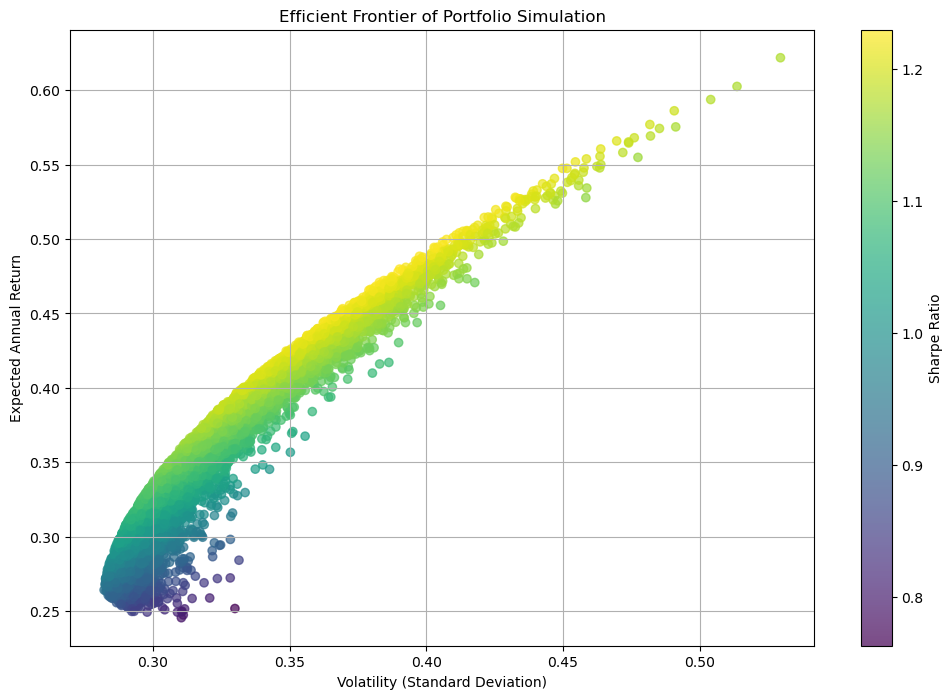

✅ Optimal Portfolio Weights:
AAPL: 42.11%
MSFT: 0.43%
GOOGL: 17.22%
TSLA: 1.52%
AMZN: 38.72%

📈 Expected Annual Return: 47.09%
📉 Annual Volatility: 38.28%
⚖️  Sharpe Ratio: 1.23


In [10]:

# Portfolio Optimization using Modern Portfolio Theory (MPT)

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Download stock data
stocks = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
data = yf.download(stocks, start='2020-01-01', end='2024-12-31')

# Use data directly as adjusted close prices
adj_close = data['Close']  # Already adjusted by yfinance# Step 3: Calculate daily returns
daily_returns = adj_close.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) * 252  # annualized
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return returns, std_dev

# Generate portfolios
def generate_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        weights_record.append(weights)
        ret, std = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = ret
        results[1,i] = std
        results[2,i] = ret / std  # Sharpe Ratio

    return results, weights_record

# Simulate 10,000 portfolios
num_portfolios = 10000
results, weights = generate_portfolios(num_portfolios, mean_returns, cov_matrix)

# Plot Efficient Frontier
plt.figure(figsize=(12,8))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Annual Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier of Portfolio Simulation')
plt.grid(True)
plt.show()

# Find the portfolio with the max Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
opt_weights = weights[max_sharpe_idx]
opt_return, opt_volatility = portfolio_performance(opt_weights, mean_returns, cov_matrix)

# Display results
print("✅ Optimal Portfolio Weights:")
for i, stock in enumerate(stocks):
    print(f"{stock}: {opt_weights[i]:.2%}")

print(f"\n📈 Expected Annual Return: {opt_return:.2%}")
print(f"📉 Annual Volatility: {opt_volatility:.2%}")
print(f"⚖️  Sharpe Ratio: {results[2, max_sharpe_idx]:.2f}")
